In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from scipy.stats import chi2_contingency

Correlations with left:
left                    1.000000
time_spend_company      0.144822
average_montly_hours    0.071287
number_project          0.023787
last_evaluation         0.006567
satisfaction_level     -0.388375
Name: left, dtype: float64
Chi-square for salary vs left: chi2=381.225 p=1.652e-83
Chi-square for department vs left: chi2=86.825 p=7.042e-15
Accuracy: 0.7976
Classification report:
               precision    recall  f1-score   support

           0       0.83      0.93      0.87      2857
           1       0.62      0.38      0.47       893

    accuracy                           0.80      3750
   macro avg       0.72      0.66      0.67      3750
weighted avg       0.78      0.80      0.78      3750

Confusion matrix:
 [[2648  209]
 [ 550  343]]
ROC AUC: 0.813770503754751


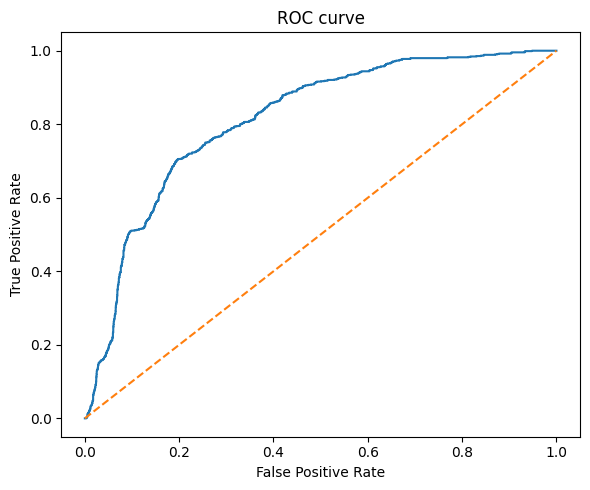

In [8]:
cont_vars = ['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']
print("Correlations with left:")
print(df[cont_vars + ['left']].corr()['left'].sort_values(ascending=False))
ct = pd.crosstab(df_orig['salary'], df_orig['left'])
chi2, p, dof, expected = chi2_contingency(ct)
print("Chi-square for salary vs left: chi2=%.3f p=%.3e" % (chi2, p))
ctd = pd.crosstab(df_orig['Department'], df_orig['left'])
chi2d, pd_val, dofd, expectedd = chi2_contingency(ctd)
print("Chi-square for department vs left: chi2=%.3f p=%.3e" % (chi2d, pd_val))
features = ['satisfaction_level','time_spend_company','number_project','average_montly_hours',
            'salary_num','promotion_last_5years','Work_accident']
for f in features:
    if f not in df.columns:
        raise KeyError(f"Feature {f} not found in dataframe columns.")

X = df[features]
y = df['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:,1]

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)
print("Classification report:\n", classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'--')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.tight_layout()
plt.show()

                 mean  count
Department                  
hr           0.290934    739
accounting   0.265971    767
technical    0.256250   2720
support      0.248991   2229
sales        0.244928   4140
marketing    0.236597    858
IT           0.222494   1227
product_mng  0.219512    902
RandD        0.153748    787
management   0.144444    630


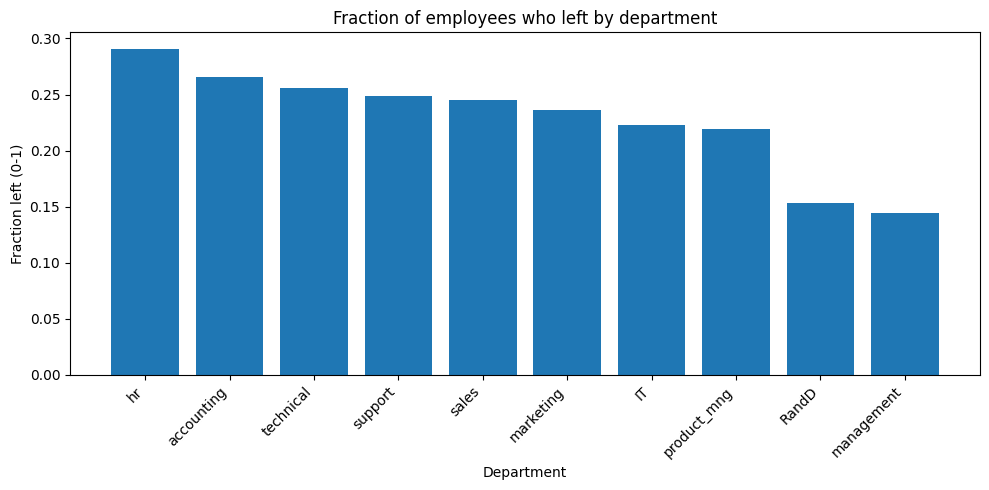

In [7]:
df_orig = pd.read_csv('/content/archive (1).zip')
dept_left = df_orig.groupby('Department')['left'].agg(['mean','count']).sort_values('mean', ascending=False)
print(dept_left)

plt.figure(figsize=(10,5))
plt.bar(dept_left.index, dept_left['mean'])
plt.title('Fraction of employees who left by department')
plt.ylabel('Fraction left (0-1)')
plt.xlabel('Department')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

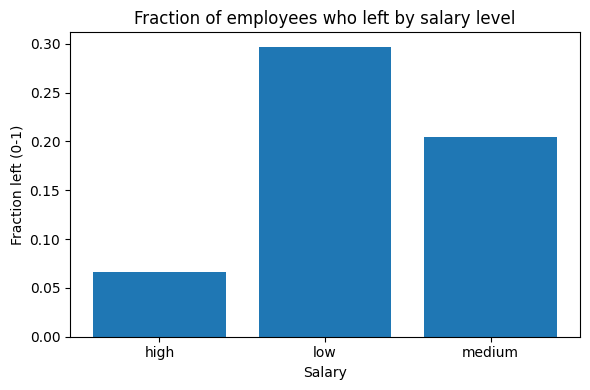

In [6]:
plt.figure(figsize=(6,4))
plt.bar(salary_left.index, salary_left['left_rate'])
plt.title('Fraction of employees who left by salary level')
plt.ylabel('Fraction left (0-1)')
plt.xlabel('Salary')
plt.tight_layout()
plt.show()

In [5]:
salary_map = {'low': 0, 'medium': 1, 'high': 2}
df['salary_num'] = df['salary'].map(salary_map)
df = pd.get_dummies(df, columns=['Department'], drop_first=True)
salary_left = df.groupby('salary').agg({'left': ['mean','count']})
salary_left.columns = ['left_rate','count']
print(salary_left)

        left_rate  count
salary                  
high     0.066289   1237
low      0.296884   7316
medium   0.204313   6446


In [4]:
df = pd.read_csv('/content/archive (1).zip')   # change path if needed
print("Shape:", df.shape)
display(df.head())

# 2) Quick info
display(df.info())
display(df.describe())

Shape: (14999, 10)


satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


None

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000